In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

## Simple Two Layer Neural Network (Input, Hidden, Output)

### Moon Dataset

In [2]:
X, y = make_moons(n_samples=500, random_state=42, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(375, 2)

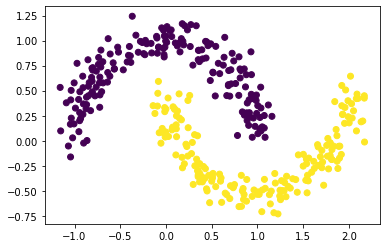

In [3]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

### Two Layer Neural Network

In [4]:
def softmax(Z): 
    expz = np.exp(Z - np.max(Z))                    #to prevent overflow
    return expz / expz.sum(axis=1, keepdims=True)   #reduce columns for each row.

In [5]:
def make_model(n_feature, n_hidden, n_output):
    model={}
    model['w1']=np.random.randn(n_feature, n_hidden)*0.01
    model['b1']= np.zeros((1,n_hidden))
    model['w2']=np.random.randn(n_hidden, n_output)*0.01
    model['b2'] = np.zeros((1,n_output))
    return model

In [6]:
def forward( model, X):
    h=X  @ model['w1'] + model['b1']
    h[h<0]=0 #relu 
    out=softmax(h @ model['w2'] + model['b2'])
    return h, out

In [7]:
def backprop(model, X, y,h, out):
    N=X.shape[0]
    dz=np.array(out) 
    dz[range(N), y ]-=1    #yhat-y
    dz/=N

    dw2 = h.T @ dz
    db2=np.sum(dz, axis=0, keepdims=True) 
    
    dh =  dz @ model['w2'].T
    dh[h<0]=0                 #relu derivative
    dw1 = X.T @ dh
    
    db1=np.sum(dh, axis=0, keepdims=True)
    
    return {'w1':dw1,'b1':db1, 'b2':db2, 'w2':dw2}

In [8]:
def get_batches(X, y, batch_size=32):
    indices=np.arange(X.shape[0])
    np.random.shuffle(indices)
    minibatches = []
    for i in range(0, X.shape[0], batch_size):
        batch_i=indices[i:i+batch_size]
        X_mini=X[batch_i]
        y_mini=y[batch_i]
        minibatches.append( (X_mini, y_mini)  )
    return minibatches

In [9]:
def sgd(model, X_train, y_train, batch_size=32, learning_rate=0.01, epochs=1000, print_at=100):
    """
    minibatch training
    """
    losses=[]
    for epoch in range(epochs+1):
        batches=get_batches(X_train, y_train, batch_size)
        epoch_loss=0
        for X,y in batches: 
            h,p=forward(model, X)
            epoch_loss+=-np.sum(np.log(p[range(y.shape[0]) ,y] )) /y.shape[0] 
            grads=backprop(model, X, y,h, p)
            model['w1'] += -learning_rate*grads['w1']
            model['b1'] += -learning_rate*grads['b1']
            model['w2'] += - learning_rate*grads['w2']
            model['b2'] += - learning_rate*grads['b2']

        losses.append(epoch_loss)
        if epoch%print_at==0:
            print('epoch=%d loss=%0.4f'%(epoch, epoch_loss))
    return losses

In [10]:
model=make_model(n_feature=2, n_hidden=200, n_output=2)
losses=sgd(model, X_train, y_train, batch_size=32, learning_rate=0.01, epochs=3000, print_at=500)

epoch=0 loss=8.3140
epoch=500 loss=2.9558
epoch=1000 loss=2.9373
epoch=1500 loss=2.9305
epoch=2000 loss=2.9318
epoch=2500 loss=2.9278
epoch=3000 loss=2.9617


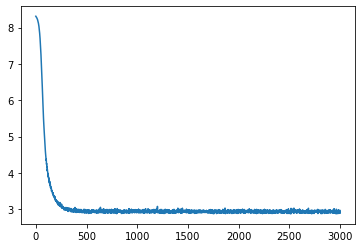

In [11]:
plt.plot(losses)

In [12]:
h,out=forward(model, X_test)
yhat=np.argmax(out, axis=1)
acc=np.mean(y_test==yhat)
print('testing accuracy:', acc)

testing accuracy: 0.856


### plotting decision boundary

In [13]:
offset=0.5
xmin=X_test[:,0].min()-offset
xmax=X_test[:,0].max()+offset
ymin=X_test[:,1].min()-offset
ymax=X_test[:,1].max()+offset

step=0.05
xd=np.arange(xmin, xmax, step)
yd=np.arange(ymin, ymax, step)
xx,yy=np.meshgrid(xd,yd)
nx=np.array([xx.flatten(), yy.flatten()]).T 

h,p=forward(model, nx)
out=np.argmax(p, axis=1)
out=out.reshape(xx.shape) 

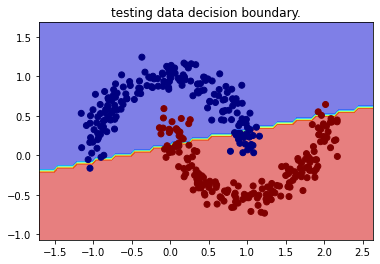

In [14]:
plt.contourf(xx, yy, out, alpha=0.5 ,cmap='jet')
plt.scatter(X_train[:,0], X_train[:,1] ,c=y_train , cmap='jet') 
plt.title('testing data decision boundary.')
plt.show()

### Training on mnist small (8x8) dataset

In [15]:
from sklearn import datasets
datas=datasets.load_digits()
data=datas['data']
label=datas['target'] 

In [16]:
X_train, X_test, y_train, y_test=train_test_split(data, label, test_size = 0.2)
print('Training:', X_train.shape, y_train.shape)
print('Testing:', X_test.shape, y_test.shape)

Training: (1437, 64) (1437,)
Testing: (360, 64) (360,)


In [18]:
n_feature=X_train.shape[1]
n_output=np.max(y_train)+1
model=make_model(n_feature=n_feature, n_hidden=200, n_output=n_output)
losses=sgd(model, X_train, y_train, batch_size=32, learning_rate=0.001, epochs=3000, print_at=500)

epoch=0 loss=103.1622
epoch=500 loss=1.4348
epoch=1000 loss=0.6264
epoch=1500 loss=0.3680
epoch=2000 loss=0.2498
epoch=2500 loss=0.1859
epoch=3000 loss=0.1461


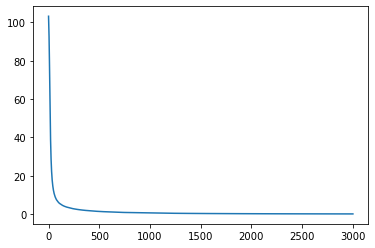

In [19]:
plt.plot(losses)

In [20]:
h,out=forward(model, X_test)
yhat=np.argmax(out, axis=1)
acc=np.mean(y_test==yhat)
print('testing accuracy:', acc)

testing accuracy: 0.9583333333333334
